In [1]:
%run helpers/autoct_plotting.py

import autoct
from os.path import join

autoct.setup_logging('INFO')

def p_plot_image(img, n_cuts=7):
    from nilearn.plotting.find_cuts import find_cut_slices
    import nilearn.plotting as plotting
    
    axes = ('x', 'y', 'z')
    # all_cuts = [find_cut_slices(img, n_cuts=n_cuts, direction=axis) for axis in axes]
    # cut_coords = [cuts[int(n_cuts/2) + 1] for cuts in all_cuts]
    
    cut_coords = [9, 5, 11]
    plotting.plot_img(img, display_mode='ortho', cut_coords=tuple(cut_coords))
    plotting.show()
        

def p_plot_images(pattern):
    from glob import glob
    import nibabel as nib
    
    for nii_file in glob(pattern):
        img = nib.load(nii_file)
        shape = img.shape
        
        if len(shape) == 3:
            print('Plotting {}:shape={}'.format(nii_file, shape))
            p_plot_image(img)
            
        if len(shape) == 5 and shape[3] == 1 and shape[4] == 3:
            data = img.get_fdata()
            
            for v in range(3):
                print('Plotting {}:volume={}:shape={}'.format(nii_file, v+1, shape))
                img = img.__class__(data[:, :, :, :, v:v+1].squeeze(), affine=img.affine)
                p_plot_image(img)

In [2]:
output = '/data/illustration_workflow_output'
mni_file = 'illustration_data/MNI152_T1_1mm_brain.nii.gz'
atlas_file = 'illustration_data/New_atlas_cort_asym_sub.nii.gz'
template_file = 'illustration_data/T_template0.nii.gz'

In [3]:
autoct.convert(pattern='illustration_data/dcmfiles/*',
            out_dir=output,
            use_dcm2niix=True)

2023-09-07 22:55:36,035 :: autoct.convert :: INFO :: Arguments: illustration_data/dcmfiles/*:/data/illustration_workflow_output
2023-09-07 22:55:36,040 :: autoct.convert :: INFO :: Processing folder illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1


Chris Rorden's dcm2niiX version v1.0.20200331  (JP2:OpenJPEG) (JP-LS:CharLS) GCC5.5.0 (64-bit Linux)
Found 35 DICOM file(s)
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-9203.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-8253.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-9353.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-9703.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-8603.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-8153.dcm'
DICOM appears corrupt: first group:element should be 0x0002:

2023-09-07 22:55:37,054 :: autoct.convert :: INFO :: Saved /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz
2023-09-07 22:55:37,056 :: autoct.utils :: INFO :: Done: processed=1


Conversion required 0.981839 seconds (0.975459 for core code).


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz:shape=(512, 512, 35)


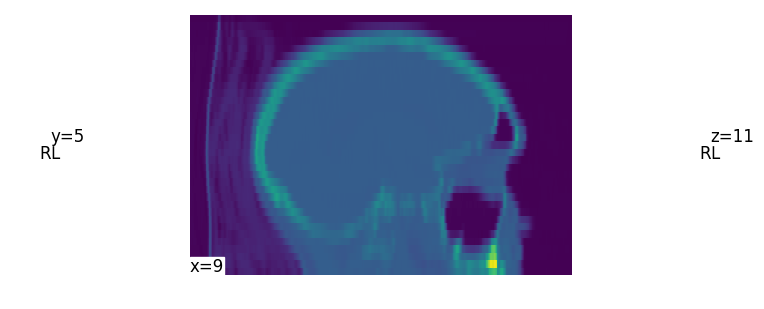

In [4]:
p_plot_images(join(output, '*', 'convert', '*.nii.gz'))

In [5]:
autoct.preprocessing(pattern=join(output, '*', 'convert', '*.nii.gz'),
                  out_dir=output,
                  mni_file=mni_file)

2023-09-07 22:55:39,643 :: autoct.preprocessing :: INFO :: Arguments: /data/illustration_workflow_output/*/convert/*.nii.gz:/data/illustration_workflow_output:illustration_data/MNI152_T1_1mm_brain.nii.gz
2023-09-07 22:55:39,648 :: autoct.preprocessing :: INFO :: Found 1 files
2023-09-07 22:55:39,650 :: autoct.preprocessing :: INFO :: Processing /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz


2023-09-07 22:55:43,778 :: autoct.preprocessing :: INFO :: Using python based resampling ...


230907-22:55:57,694 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.6.0
Final FOV is: 
0.000000 250.000000 0.000000 250.000000 4.000000 170.000000 


--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalized
 Fixed images:             illustration_data/MNI152_T1_1mm_brain.nii.gz
 Moving images:            /tmp/tmpzvrn4hrj/corrected.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        3
 Spline distance:          26
 Transform type:           a
 CC radius:                4
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
-------------------------------

2023-09-07 23:03:11,648 :: autoct.preprocessing :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1
2023-09-07 23:03:11,688 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedWarped.nii.gz:shape=(182, 218, 182)


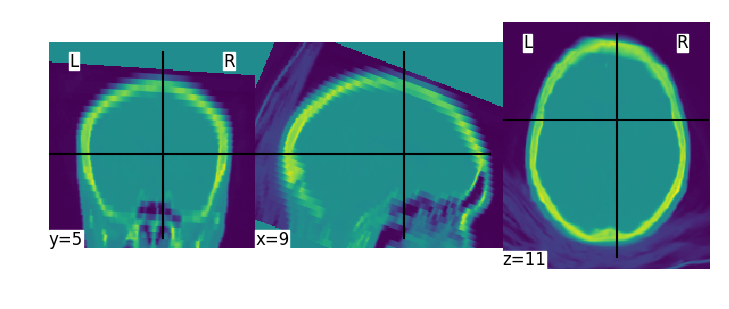

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedInverseWarped.nii.gz:shape=(250, 250, 170)


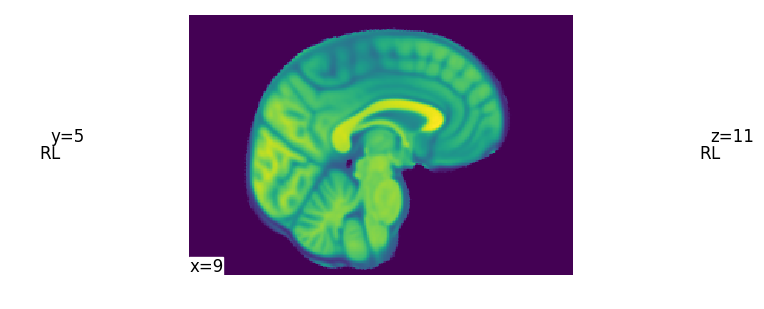

In [6]:
p_plot_images(join(output, '*', 'preprocessing', '*.nii.gz'))

In [7]:
autoct.bone_strip(pattern=join(output, '*', 'preprocessing', '*.nii.gz'),
                out_dir=output)

2023-09-07 23:03:14,795 :: autoct.bone_strip :: INFO :: Arguments: /data/illustration_workflow_output/*/preprocessing/*.nii.gz:/data/illustration_workflow_output
2023-09-07 23:03:14,807 :: autoct.bone_strip :: INFO :: Found 1 files
2023-09-07 23:03:14,812 :: autoct.bone_strip :: INFO :: Processing file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedWarped.nii.gz


min 0 thresh2 0 thresh 3.35545 thresh98 33.5545 max 82.4434
c-of-g 89.3626 105.023 73.1312 mm
radius 68.3971 mm
median within-brain intensity 26.4069
self-intersection total 254.054 (threshold=4000.0) 


2023-09-07 23:03:31,174 :: autoct.bone_strip :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
2023-09-07 23:03:31,176 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz:shape=(182, 218, 182)


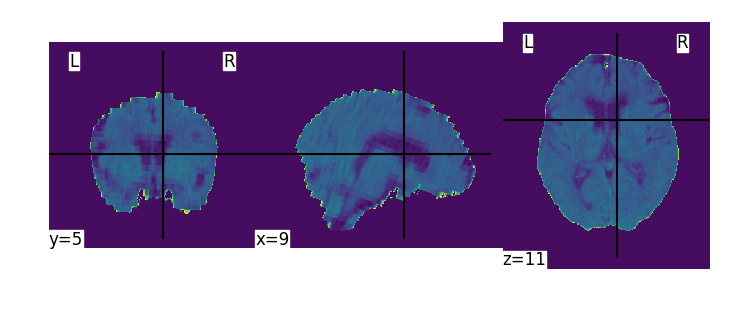

In [8]:
p_plot_images(join(output, '*', 'bone_strip', '*.nii.gz'))

In [9]:
autoct.registration(pattern=join(output, '*', 'bone_strip', '*.nii.gz'),
                 out_dir=output,
                 template=template_file,
                 transforms=autoct.supported_registration_transforms())

2023-09-07 23:03:32,130 :: autoct.registration :: INFO :: Arguments: /data/illustration_workflow_output/*/bone_strip/*.nii.gz:/data/illustration_workflow_output:illustration_data/T_template0.nii.gz:('s', 'a', 'so')
2023-09-07 23:03:32,138 :: autoct.registration :: INFO :: Found 1 files
2023-09-07 23:03:32,152 :: autoct.registration :: INFO :: Processing a:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz



--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affine
 Fixed images:             illustration_data/T_template0.nii.gz
 Moving images:            /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        4
 Spline distance:          26
 Transform type:           a
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/opt/ants-2.3.1/antsRegistration --verbose 1 --dimensionali

2023-09-07 23:05:09,161 :: autoct.registration :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affine
2023-09-07 23:05:09,162 :: autoct.registration :: INFO :: Processing s:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz



--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN
 Fixed images:             illustration_data/T_template0.nii.gz
 Moving images:            /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        4
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/opt/ants-2.3.1/antsRegistration --verbose 1 --dimensionality 3 -

2023-09-07 23:08:29,383 :: autoct.registration :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN
2023-09-07 23:08:29,387 :: autoct.registration :: INFO :: Processing so:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/bone_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz



--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn
 Fixed images:             illustration_data/T_template0.nii.gz
 Moving images:            /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineWarped.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        4
 Spline distance:          26
 Transform type:           so
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/opt/ants-2.3.1/antsR

2023-09-07 23:10:49,096 :: autoct.registration :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn
2023-09-07 23:10:49,098 :: autoct.utils :: INFO :: Done: processed=3


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


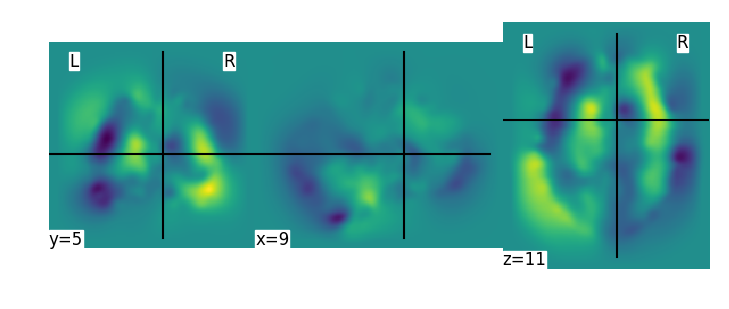

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


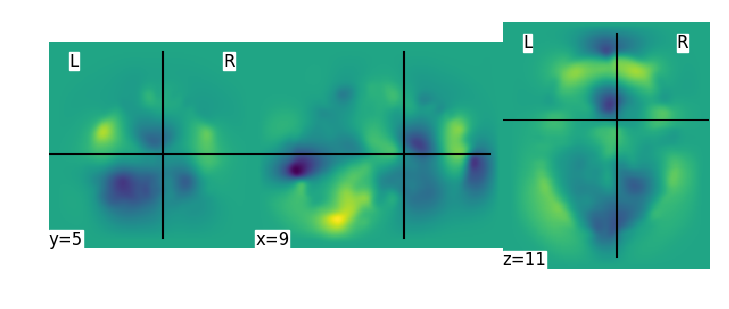

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


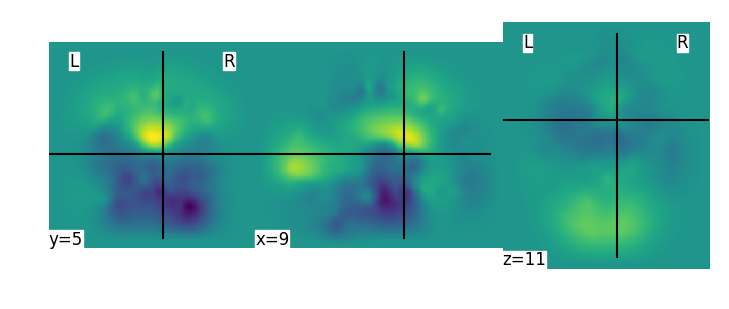

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyNWarped.nii.gz:shape=(182, 218, 182)


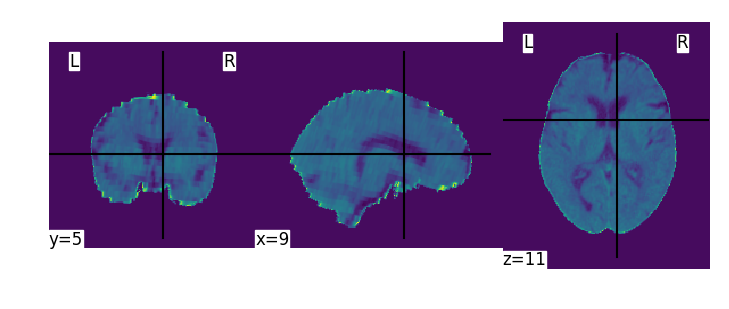

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


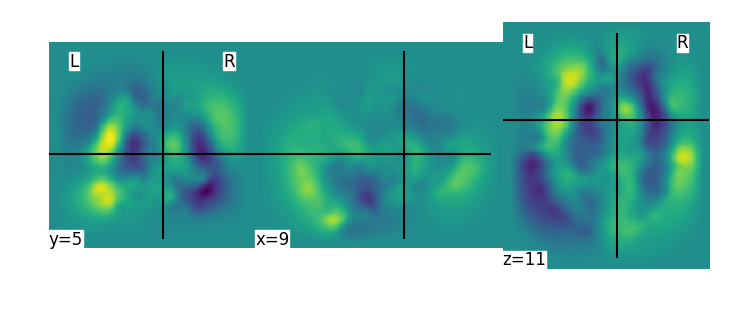

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


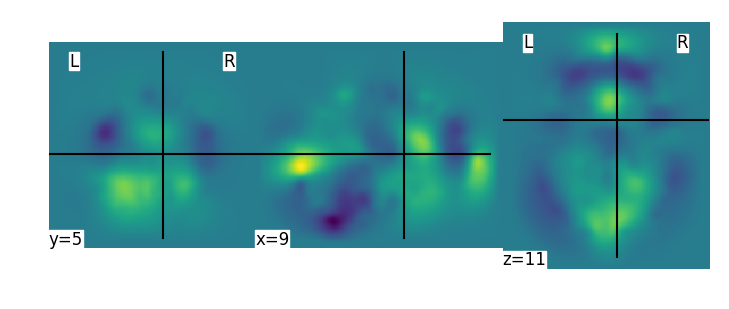

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


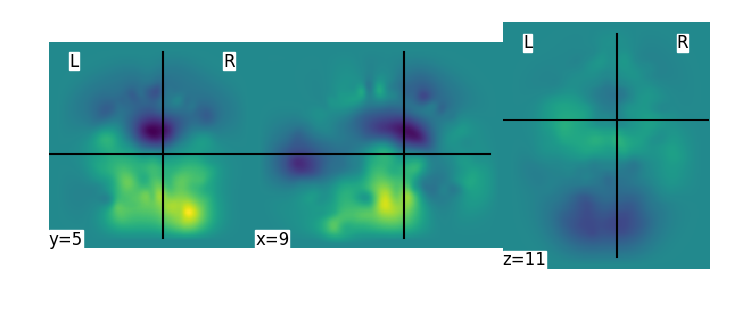

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyNInverseWarped.nii.gz:shape=(182, 218, 182)


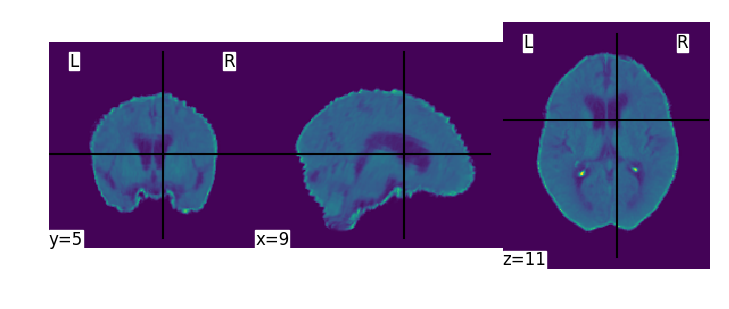

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


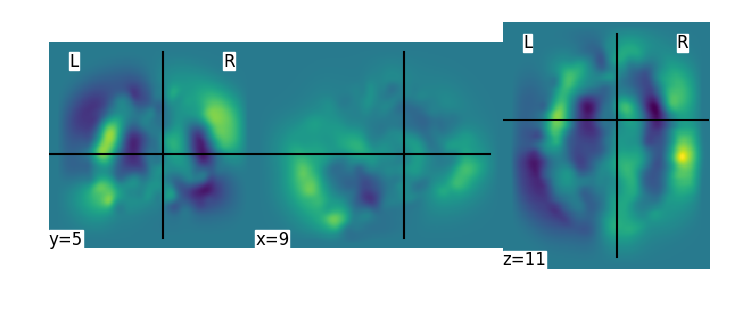

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


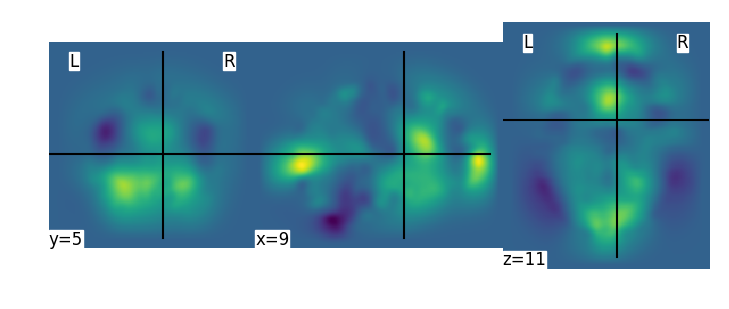

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


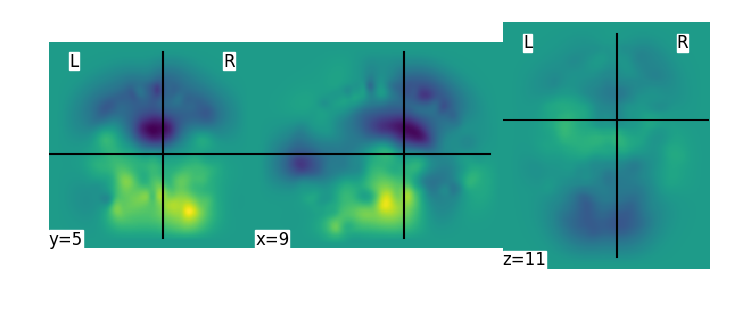

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2SynInverseWarped.nii.gz:shape=(182, 218, 182)


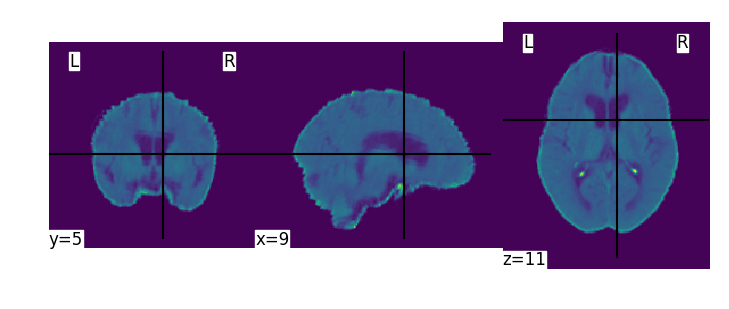

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


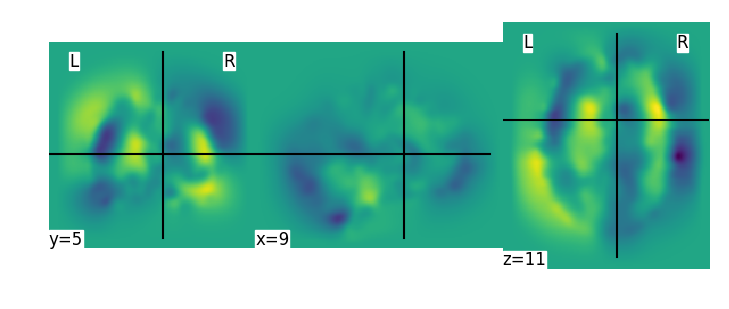

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


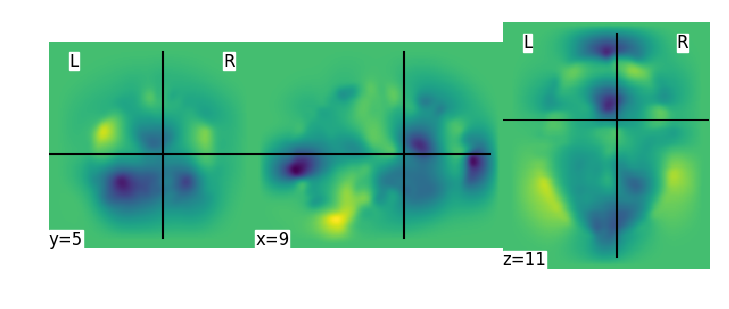

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


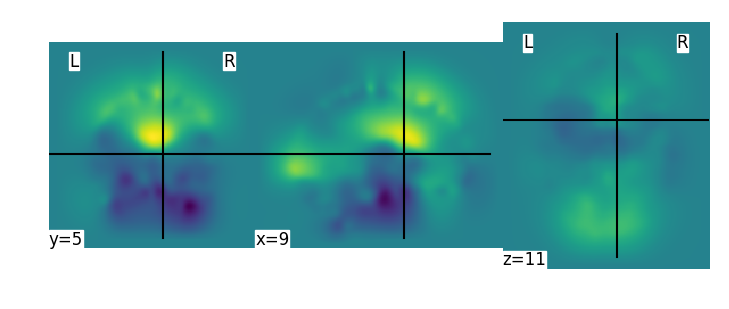

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2SynWarped.nii.gz:shape=(182, 218, 182)


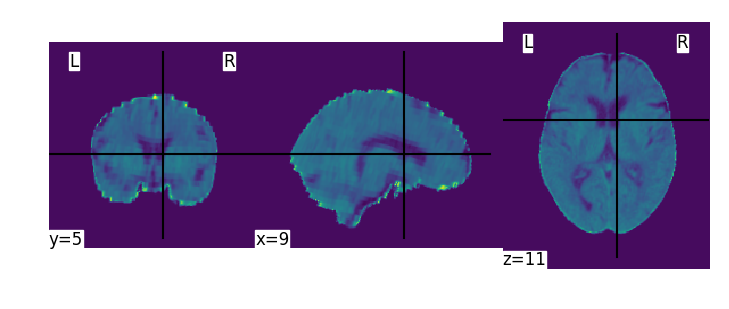

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineInverseWarped.nii.gz:shape=(182, 218, 182)


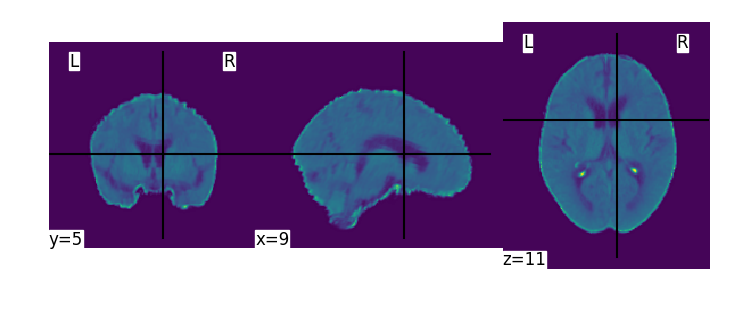

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineWarped.nii.gz:shape=(182, 218, 182)


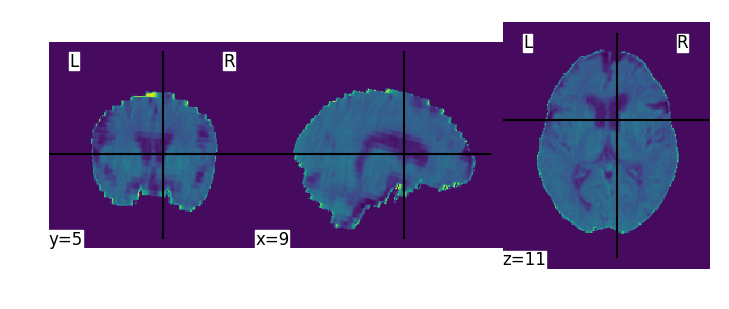

In [10]:
p_plot_images(join(output, '*', 'registration', '*/*.nii.gz'))

In [11]:
autoct.segmentation(pattern=join(output, '*', 'registration', '*/*.nii.gz'),
                 out_dir=output,
                 atlas=atlas_file,
                 types=autoct.supported_segmentation_types())

2023-09-07 23:11:15,436 :: autoct.segmentation :: INFO :: Arguments: /data/illustration_workflow_output/*/registration/*/*.nii.gz:/data/illustration_workflow_output:illustration_data/New_atlas_cort_asym_sub.nii.gz:('Affine', 'Physical')
2023-09-07 23:11:15,445 :: autoct.segmentation :: INFO :: Found 2 files
2023-09-07 23:11:15,453 :: autoct.segmentation :: INFO :: Processing Affine:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz
2023-09-07 23:12:04,967 :: autoct.segmentation :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz
2023-09-07 23:12:04,968 :: autoct.segmentation :: INFO :: Processing Physical:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz
2023-09-07 23:12:43,394 :: autoct.segmentation :: I

(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz:shape=(182, 218, 182)


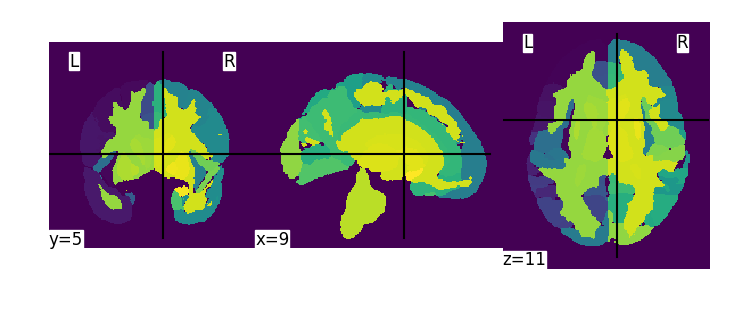

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/PHYSCi/ID_0eba6ca7-7473dee7c1_segmentation_cortical_phy.nii.gz:shape=(182, 218, 182)


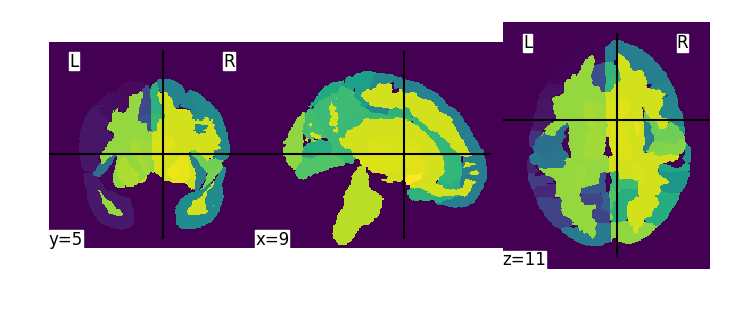

In [12]:
p_plot_images(join(output, '*', 'segmentation', '*/*.nii.gz'))

In [13]:
autoct.label_geometry_measures(pattern=join(output, '*', 'segmentation', '*/*.nii.gz'),
                            out_dir=output)

2023-09-07 23:12:46,263 :: autoct.label_geometry_measures :: INFO :: Arguments /data/illustration_workflow_output/*/segmentation/*/*.nii.gz:/data/illustration_workflow_output
2023-09-07 23:12:46,276 :: autoct.label_geometry_measures :: INFO :: Found 2 files
2023-09-07 23:12:46,279 :: autoct.label_geometry_measures :: INFO :: Processing file name:  /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz
2023-09-07 23:12:46,283 :: autoct.label_geometry_measures :: INFO :: Saving to file name: /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.txt
2023-09-07 23:12:47,966 :: autoct.label_geometry_measures :: INFO :: Saving to csv file name: /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.csv
2023-09-07 23:12:47,981 :: autoct.label_geometry_meas

(0, None)

In [14]:
plot_csv_files(pattern=join(output, '*', 'label_geometry_measures', '*.csv'))

Plotting csv file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.csv


,Label,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation
0,1,52721,13100.700,0.932199,2.76284
1,2,9295,3991.190,0.975718,4.56560
2,3,21409,7660.910,0.961342,3.63164
3,4,23057,6712.510,0.922550,2.59150
4,5,5265,2174.060,0.888528,2.17950
...,...,...,...,...,...
110,111,6644,2433.960,0.952898,3.29717
111,112,2331,1057.670,0.929977,2.72022
112,113,6498,2610.660,0.979568,4.97233
113,114,3146,1243.150,0.823483,1.76261


Plotting csv file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_phy.csv


,Label,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation
0,1,55015,13393.100,0.932850,2.77574
1,2,9576,4053.460,0.974383,4.44650
2,3,22243,7734.850,0.957170,3.45390
3,4,23657,6758.470,0.919332,2.54141
4,5,5350,2227.710,0.883972,2.13886
...,...,...,...,...,...
110,111,6814,2483.470,0.953619,3.32208
111,112,2450,1079.250,0.921488,2.57463
112,113,6423,2609.640,0.979337,4.94474
113,114,3209,1265.170,0.822131,1.75655


In [15]:
autoct.warp_intensity_stats(pattern=join(output, '*', 'registration', '*/*.nii.gz'),
                         out_dir=output,
                         atlas=atlas_file)

2023-09-07 23:12:50,396 :: autoct.warp_intensity_stats :: INFO :: Arguments /data/illustration_workflow_output/*/registration/*/*.nii.gz:/data/illustration_workflow_output:illustration_data/New_atlas_cort_asym_sub.nii.gz
2023-09-07 23:12:50,403 :: autoct.warp_intensity_stats :: INFO :: Found 1 files
2023-09-07 23:12:50,422 :: autoct.warp_intensity_stats :: INFO :: Processing /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz
2023-09-07 23:12:54,454 :: autoct.warp_intensity_stats :: INFO :: Saved to csv file name: /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/warp_intensity_stats/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.csv
2023-09-07 23:12:54,458 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

In [16]:
plot_csv_files(pattern=join(output, '*', 'warp_intensity_stats', '*.csv'))

Plotting csv file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/warp_intensity_stats/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.csv


,Label,Mean,Sigma,Skewness,Kurtosis
0,1,-0.891490,0.715223,-1.507620,-8033.19000
1,2,-1.243600,0.820039,-0.959836,-1355.43000
2,3,-0.254451,0.394518,-0.039358,841.63500
3,4,-0.408499,0.331873,0.193649,1256.31000
4,5,-0.725162,0.198675,-0.870290,-539.05700
...,...,...,...,...,...
110,111,-1.271010,0.411912,-0.057790,-17.91110
111,112,-1.287370,0.253549,0.048428,8.96160
112,113,-0.987602,0.337277,-0.037755,-1.26943
113,114,-1.750910,0.252539,-0.217100,-51.56870
